In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

%matplotlib inline
sns.set()

### Two-state Markov chain

$$
\begin{bmatrix}
S(n) \\
N(n)
\end{bmatrix}
=
\begin{bmatrix}
a & 1-b \\
1-a & b
\end{bmatrix}
\begin{bmatrix}
S(n-1) \\
N(n-1)
\end{bmatrix}
$$

given that $S(n) \geq 0$, $N(n) \geq 0$ and $S(n) + N(n) = 1$.

<img src='two-state-chain.PNG'>

In [2]:
a_vals = [0.8, 0.9, 0.95]
b_vals = [0.3, 0.6, 0.9]
S0 = 0.1
N0 = 1-S0

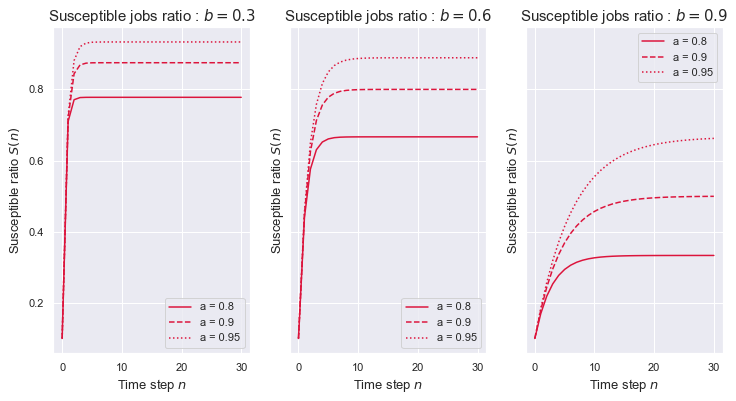

In [3]:
ncols = len(b_vals)
styles = ['solid', 'dashed', 'dotted']

fig, ax = plt.subplots(figsize=(12,6), ncols=ncols, sharey=True)

for i, (a, b) in enumerate(product(a_vals, b_vals)):
    T = 30
    Ss, Ns = [S0], [N0]
    M = np.array([[a, 1-b], [1-a, b]]) # transition matrix

    for _ in range(T):
        Sn, Nn = M.dot(np.array([Ss[-1], Ns[-1]]))
        Ss.append(Sn)
        Ns.append(Nn)

    col = i % ncols
    ax[col].set_title('Susceptible jobs ratio : $b = {}$'.format(b), fontsize=15)
    ax[col].plot(Ss, label='a = {}'.format(a), color='crimson', linestyle=styles[i // ncols])
    ax[col].set_ylabel('Susceptible ratio $S(n)$', fontsize=13)
    ax[col].set_xlabel('Time step $n$', fontsize=13)
    ax[col].legend()

plt.show()

### Three-state Markov chain

$$
\begin{bmatrix}
S(n) \\
M(n) \\
N(n)
\end{bmatrix}
=
\begin{bmatrix}
1 - a_1 - a_2 & b_2 & c_1 \\
a_1 & 1 - b_1 - b_2 & c_2 \\
a_2 & b_1 & 1 - c_1 - c_2
\end{bmatrix}
\begin{bmatrix}
S(n-1) \\
M(n-1) \\
N(n-1)
\end{bmatrix}
$$

<img src='three-state-chain.PNG'>

In [4]:
a_vals = [(0.05, 0.05), (0.10, 0.05), (0.20, 0.10), (0.40, 0.20)]
b_vals = [(0.05, 0.60), (0.10, 0.30), (0.10, 0.30), (0.10, 0.40)]
c_vals = [(0.45, 0.45), (0.30, 0.30), (0.30, 0.30), (0.20, 0.40)]
S0, M0, N0 = 0.2, 0.0, 0.8

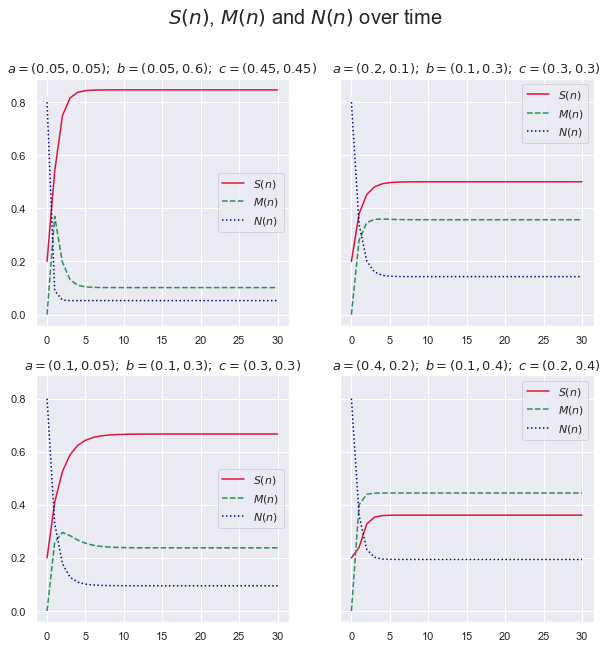

In [5]:
ncols = int(np.sqrt(len(a_vals)))
nrows = ncols

styles = ['solid', 'dashed', 'dotted']
colors = ['crimson', 'seagreen', 'navy']

fig, ax = plt.subplots(figsize=(10,10), ncols=ncols, nrows=nrows, sharey=True)

for i, ((a1, a2), (b1, b2), (c1, c2)) in enumerate(zip(a_vals, b_vals,c_vals)):
    T = 30
    Ss, Ms, Ns = [S0], [M0], [N0]
    M = np.array([[1-a1-a2, b2, c1],
                      [a1, 1-b1-b2, c2],
                      [a2, b1, 1-c1-c2]])

    for _ in range(T):
        Sn, Mn, Nn = M.dot(np.array([Ss[-1], Ms[-1], Ns[-1]]))
        Ss.append(Sn)
        Ms.append(Mn)
        Ns.append(Nn)

    row, col = i % nrows, i // ncols
    ax[row,col].set_title('$a=({},{});\ b=({},{});\ c=({},{})$'.format(a1,a2,b1,b2,c1,c2), fontsize=13)
    ax[row,col].plot(Ss, label='$S(n)$', color=colors[0], linestyle=styles[0])
    ax[row,col].plot(Ms, label='$M(n)$', color=colors[1], linestyle=styles[1])
    ax[row,col].plot(Ns, label='$N(n)$', color=colors[2], linestyle=styles[2])
    ax[row,col].legend()
    
fig.suptitle('$S(n)$, $M(n)$ and $N(n)$ over time', fontsize=20)
plt.show() 